In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
primary_url = 'https://fangj.github.io/friends/'
request = requests.get(primary_url)
soup = BeautifulSoup(request.content)

In [3]:
url_list = []

for link in soup.find_all('a'):
    url_list.append(link.get('href'))

In [4]:
url_list = [primary_url + url for url in url_list]

In [5]:
final_text_list = []

In [6]:
def process_urls(url_list):
    for url in url_list:
        re = requests.get(url)
        isoup = BeautifulSoup(re.content)
        final_text_list.append(isoup.find_all('p'))    

In [10]:
process_urls(url_list)

In [22]:
import re
scenes_list = []
for i in final_text_list:
    for j in i:
        if re.search(r'Scene:', str(j)):
            scenes_list.append(str(j))

In [23]:
scenes_list

['<p align="left">[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]</p>',
 '<p align="left"><font size="3"><b>Rachel:</b> Ooh, I was kinda hoping that wouldn\'t be an\nissue... [Scene: Monica\'s Apartment, everyone is there and watching a Spanish Soap on TV\nand are trying to figure out what is going on.]</font></p>',
 '<p align="left"><font color="#0000FF" size="3">[Scene: The Subway, Phoebe is singing for\nchange.]</font></p>',
 '<p align="left"><font size="3">[Scene: Ross\'s Apartment, the guys are there assembling\nfurniture.]</font></p>',
 '<p align="left"><font size="3">[Scene: A Restaurant, Monica and Paul are eating.]</font></p>',
 '<p align="left"><font size="3"><font color="#0000FF"><b>Monica:</b> That\'s right.</font>\n[Scene: Monica\'s Apartment, Rachel is talking on the phone and pacing.]</font></p>',
 '<p align="left"><font size="3">[Scene: Ross\'s Apartment; Ross is pacing while Joey and\nChandler are working on some more furniture.]</font></p>',
 '<p 

In [24]:
clean_scenes_list = []

for i in scenes_list:
    pattern = re.search(r'\[(.*?)\]',i)
    if pattern:
        pattern = pattern.group()[1:-1]
        clean_scenes_list.append(pattern)

In [36]:
clean_scenes_list

import io
num = 0
with io.open('clean_scenes_list.txt', 'w', encoding='utf-8') as f:
    for ele in clean_scenes_list:
        num += 1
        f.write(str(num)+'.'+' '+ele+'\n')
f.close()

In [37]:
j = 0
for i in clean_scenes_list:
    length = len(clean_scenes_list[j].split())
    if (length == 2):
        clean_scenes_list[j] = clean_scenes_list[j].split()[1] 
    elif (length == 3):
        clean_scenes_list[j] = clean_scenes_list[j].split()[1] + clean_scenes_list[j].split()[2]
    elif (length == 4):
        clean_scenes_list[j] = clean_scenes_list[j].split()[1] + clean_scenes_list[j].split()[2] + clean_scenes_list[j].split()[3]
    else:
        clean_scenes_list[j] = clean_scenes_list[j].split()[1] + clean_scenes_list[j].split()[2] + clean_scenes_list[j].split()[3] + clean_scenes_list[j].split()[4]
    j += 1

In [38]:
clean_scenes_list

['CentralPerk,Chandler,Joey,',
 'ARestaurant,Monicaand',
 "Monica'sApartment,Rachelis",
 'Iridium,Monicaisworking',
 'CentralPerk,everyonebut',
 'CentralPerk,everyoneis',
 "CentralPark,everyone'sthere.",
 "Carol'sOB/GYN,Carolis",
 "Carol'sOB/GYN,they'retalking",
 "Carol'sOB/GYN,they'restill",
 'CentralPerk,everyonebut',
 "ChandlerandJoey's,Chandler",
 'Iridium,MonicaandPaula',
 "MonicaandRachel's,Chandler",
 'Astreet,Phoebewalks',
 'AStreet,Phoebeand',
 'CentralPerk,Phoebeis',
 'Iridium,MonicaandPaula',
 'CentalPerk,Joeyand',
 "MonicaandRachel's,everyond",
 'ARestaurant,Monicais',
 "MonicaandRachel's,everyone",
 'CentralPerk,everyoneis',
 "MonicaandRachel's,the",
 'TheEmergencyRoom,Ross',
 'CentralPerk,allsix',
 'CentralPerk,allare',
 "Ross'apartment,Chandleris",
 'Fancyrestaurant,Monica,Joey,',
 'Fancyrestaurant,Joeyand',
 "Theladies'bathroomat",
 'CentralPerk,Phoebeis',
 'Thelaundromat.',
 'TheLaunderama.Rachelis',
 'CentralPerk,everyoneelse',
 "MonicaandRachel's,Rachel",
 "Monicaand

In [39]:
j = 0
for i in clean_scenes_list:
    clean_scenes_list[j] = clean_scenes_list[j].split(',')[0]
    j += 1

In [40]:
j = 0
for i in clean_scenes_list:
    pattern1 = re.search(r'CentralPerk',i)
    pattern2 = re.search(r'Chandler',i)
    pattern3 = re.search(r'Joey',i)
    pattern4 = re.search(r'Monica',i)
    pattern5 = re.search(r'Rachel',i)
    pattern6 = re.search(r'Ross',i)
    pattern7 = re.search(r'Phoebe',i)
    
    if pattern1:
        pattern1 = pattern1.group()
        clean_scenes_list[j] = "Central Perk"
    elif pattern2:
        pattern2 = pattern2.group()
        clean_scenes_list[j] = "Chandler and Joey's Apartment"
    elif pattern3:
        pattern3 = pattern3.group()
        clean_scenes_list[j] = "Chandler and Joey's Apartment"
    elif pattern4:
        pattern4 = pattern4.group()
        clean_scenes_list[j] = "Monica and Rachel's Apartment"
    elif pattern5:
        pattern5 = pattern5.group()
        clean_scenes_list[j] = "Monica and Rachel's Apartment"
    elif pattern6:
        pattern6 = pattern6.group()
        clean_scenes_list[j] = "Ross's Apartment"
    elif pattern7:
        pattern7 = pattern7.group()
        clean_scenes_list[j] = "Phoebe's Apartment"
    else:
        clean_scenes_list[j] = ""
    
    j += 1

In [41]:
clean_scenes_list

['Central Perk',
 '',
 "Monica and Rachel's Apartment",
 '',
 'Central Perk',
 'Central Perk',
 '',
 '',
 '',
 '',
 'Central Perk',
 "Chandler and Joey's Apartment",
 '',
 "Monica and Rachel's Apartment",
 '',
 '',
 'Central Perk',
 '',
 '',
 "Monica and Rachel's Apartment",
 '',
 "Monica and Rachel's Apartment",
 'Central Perk',
 "Monica and Rachel's Apartment",
 '',
 'Central Perk',
 'Central Perk',
 "Ross's Apartment",
 '',
 '',
 '',
 'Central Perk',
 '',
 "Monica and Rachel's Apartment",
 'Central Perk',
 "Monica and Rachel's Apartment",
 "Monica and Rachel's Apartment",
 '',
 "Chandler and Joey's Apartment",
 "Monica and Rachel's Apartment",
 "Monica and Rachel's Apartment",
 "Monica and Rachel's Apartment",
 '',
 "Monica and Rachel's Apartment",
 '',
 "Monica and Rachel's Apartment",
 "Monica and Rachel's Apartment",
 '',
 "Monica and Rachel's Apartment",
 "Monica and Rachel's Apartment",
 '',
 "Monica and Rachel's Apartment",
 '',
 'Central Perk',
 '',
 "Monica and Rachel's Apar

In [46]:
scene_location_list = [i for i in clean_scenes_list if i]
num = 0
with io.open('scene_location_list.txt', 'w', encoding='utf-8') as f:
    for ele in scene_location_list:
        num += 1
        f.write(str(num)+'.'+' '+ele+'\n')
f.close()

In [47]:
import pandas as pd
df = pd.DataFrame(scene_location_list) 

In [48]:
df

,0
0,Central Perk
1,Monica and Rachel's Apartment
2,Central Perk
3,Central Perk
4,Central Perk
...,...
2041,Ross's Apartment
2042,Ross's Apartment
2043,Monica and Rachel's Apartment
2044,Phoebe's Apartment


In [97]:
df[0].value_counts()

Chandler and Joey's Apartment    624
Monica and Rachel's Apartment    614
Central Perk                     611
Ross's Apartment                 125
Phoebe's Apartment                72
Name: 0, dtype: int64

In [98]:
import matplotlib.pyplot as plt

In [99]:
df[0].value_counts().count()

5

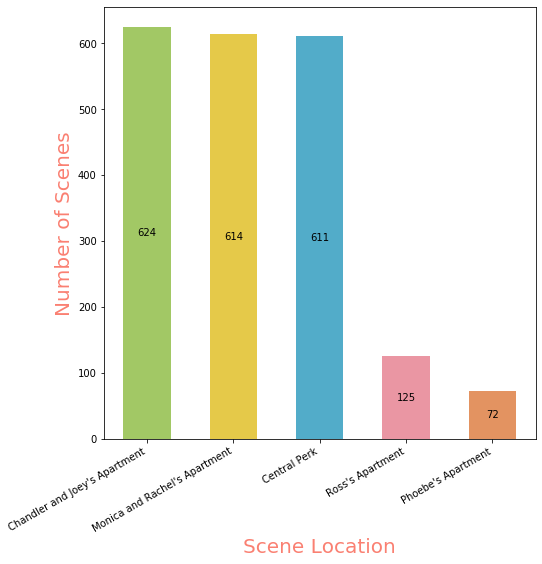

In [109]:
fig = plt.figure(figsize=(6,6))
x = ["Chandler and Joey's Apartment", "Monica and Rachel's Apartment", "Central Perk", "Ross's Apartment", "Phoebe's Apartment"]
ax = fig.add_axes([0,0,1,1])

rects = plt.bar(x,df[0].value_counts(), width=0.55,color=['#A2C865','#E5C949','#52ACC9','#EA96A3','#E39361'])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height/2),
                    ha='center', va='center')
        
ax.set_xlabel('Scene Location', fontsize=20, color='salmon')
ax.set_ylabel('Number of Scenes', fontsize=20, color='salmon')
autolabel(rects)

plt.savefig('location_summary.jpg', bbox_inches = 'tight')